## Machine Learning Model

## All imports

In [39]:
import warnings
from warnings import simplefilter
import pandas as pd
import numpy as np
from pickle import dump, load
import matplotlib.pyplot as plt

from sklearn.exceptions import DataConversionWarning
from sklearn.utils import DataConversionWarning as skDataConversionWarning
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier, plot_importance

Importing data:

In [40]:
# load the csv data sets
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")

y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [41]:
X_train

,SEXOa,EDADa,ESTUDIOS,G21,G22,G23,G24a,G25a_1,G25a_5,G25a_6,...,R108_2,R108_4,T113,P87_2a_nuevo,P87_4a_nuevo,P87_5a_nuevo,P87_7a_nuevo,P87_12a_nuevo,P87_13a_nuevo,P87_18a_nuevo
0,2.0,15.0,5.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,40.0,9.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,45.0,4.0,2.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,34.0,7.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,83.0,4.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17652,2.0,55.0,4.0,2.0,2.0,3.0,3.0,0.0,1.0,1.0,...,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17653,2.0,38.0,5.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17654,1.0,37.0,6.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17655,2.0,56.0,9.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
X_test

,SEXOa,EDADa,ESTUDIOS,G21,G22,G23,G24a,G25a_1,G25a_5,G25a_6,...,R108_2,R108_4,T113,P87_2a_nuevo,P87_4a_nuevo,P87_5a_nuevo,P87_7a_nuevo,P87_12a_nuevo,P87_13a_nuevo,P87_18a_nuevo
0,2.0,24.0,9.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,65.0,9.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,...,0.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,60.0,8.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,83.0,6.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,92.0,4.0,4.0,1.0,1.0,4.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,2.0,41.0,7.0,4.0,1.0,2.0,3.0,0.0,0.0,1.0,...,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4411,2.0,85.0,3.0,2.0,1.0,3.0,2.0,1.0,0.0,1.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4412,2.0,53.0,9.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4413,2.0,78.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y_train

,dep_anx
0,0
1,0
2,0
3,0
4,0
...,...
17652,0
17653,0
17654,0
17655,0


In [44]:
y_test

,dep_anx
0,0
1,1
2,0
3,0
4,0
...,...
4410,1
4411,0
4412,0
4413,0


## Training baseline model

In [45]:
## XGBoost Classifier
# Create an XGBoost classifier with a specified random state
model_x = XGBClassifier(random_state=42)

# Train the model on the training set
model_x.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [46]:
y_pred_train = model_x.predict(X_train)
# Save the trained model to a file
dump(model_x, open("../models/x_boosting_default_model_2.pk", "wb"))

### Printing hyperparameters of XGBoost

In [47]:
# Obtener y mostrar todos los parámetros del modelo
params = model_x.get_params()

# Imprimir los parámetros
for key, value in params.items():
    print(f"{key}")

objective
base_score
booster
callbacks
colsample_bylevel
colsample_bynode
colsample_bytree
device
early_stopping_rounds
enable_categorical
eval_metric
feature_types
gamma
grow_policy
importance_type
interaction_constraints
learning_rate
max_bin
max_cat_threshold
max_cat_to_onehot
max_delta_step
max_depth
max_leaves
min_child_weight
missing
monotone_constraints
multi_strategy
n_estimators
n_jobs
num_parallel_tree
random_state
reg_alpha
reg_lambda
sampling_method
scale_pos_weight
subsample
tree_method
validate_parameters
verbosity


### Evaluating baseline model performance

#### Baseline Accuracy

In [48]:
#calculate the accuracy
train_score = accuracy_score(y_train, y_pred_train)
print(f'The accuracy score for Train is {train_score}.')

# Make predictions on the testing set and calculate the accuracy
y_pred_test = model_x.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print(f'The accuracy score for Test is {test_score}.')

# Calculate and print the difference in accuracy between the training and testing sets
difference = train_score - test_score
print(f'The accuracy difference between the models is {difference}.')

The accuracy score for Train is 0.9655660644503596.
The accuracy score for Test is 0.8921857304643261.
The accuracy difference between the models is 0.0733803339860335.


#### Confusion Matrix

Although the baseline model has a baseline accuracy of 90%, the confusion matrix shows that the model is predicting 316 instances of no risk of depression or anxiety when in reality these are people at risk of developing these conditions

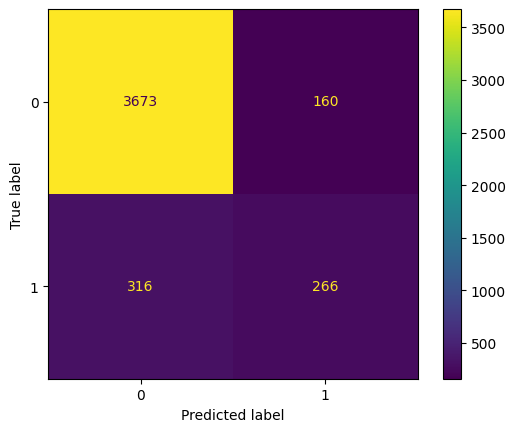

In [49]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_x.classes_)
disp.plot()

### Feature importance

The following graph shows the importance of each of the features on predicting the risk of depression or anxiety.

The three most important features are age, number of days where walked at least 10 min, and level of education

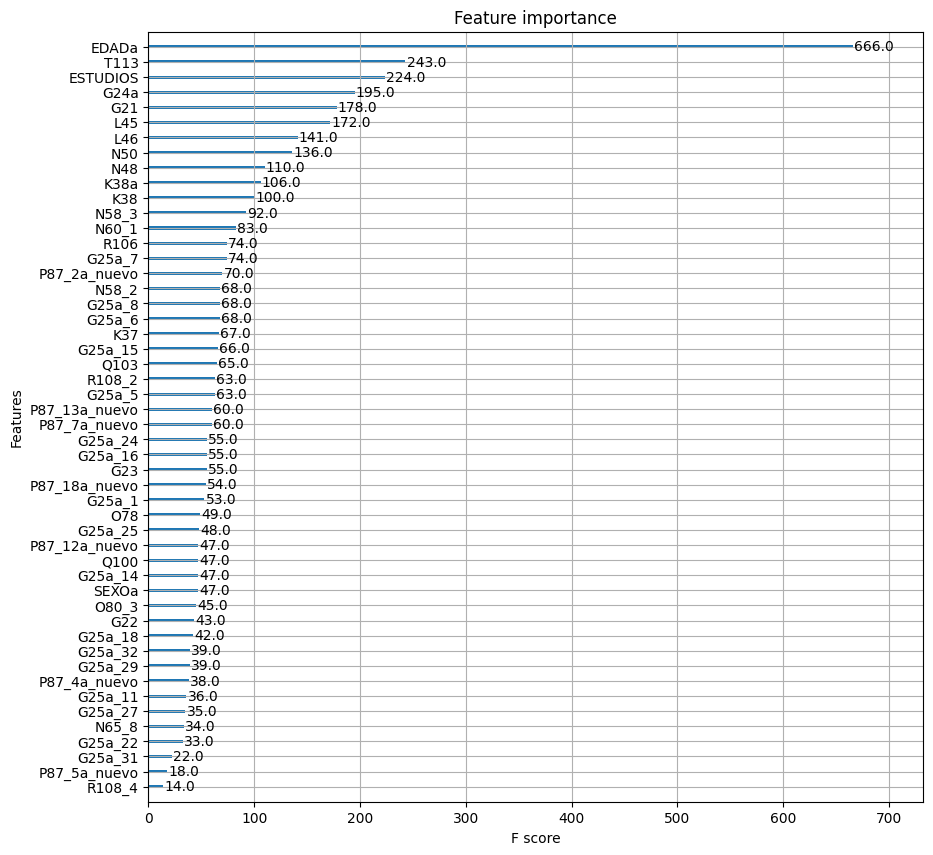

In [50]:
# plt.figure(figsize=(80,80))

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model_x, ax=ax)

# plot_importance(model_x, height=10)
plt.show()
# plt.tight_layout()

Plot the tree

In [51]:
# from xgboost import plot_tree
# import matplotlib.pyplot as plt

# # Visualizar el primer árbol del modelo
# fig, ax = plt.subplots(figsize=(80, 80))
# plot_tree(model_x, num_trees=0, rankdir='LR',ax=ax)  # num_trees indica qué árbol visualizar
# plt.show()

In [52]:
## Modificar tamaño grafico PENDIENTE


# Visualizar los primeros cinco árboles del modelo
# for i in range(5):
#     plt.figure(figsize=(80, 80))
#     plot_tree(model_x, num_trees=i, rankdir='LR')
#     plt.title(f'Árbol {i+1}')
#     plt.show()

Gradient a comprobar 

In [53]:

# from sklearn.ensemble import GradientBoostingClassifier

# ## Gardient Boost Classifier
# # Create a Gradient Boosting classifier with specified parameters
# model = GradientBoostingClassifier(n_estimators=10, random_state=24)

# # Train the model on the training set
# model.fit(X_train, y_train)

# # Make predictions on the training set and calculate the accuracy
# y_pred_train = model.predict(X_train)
# train_score = accuracy_score(y_train, y_pred_train)
# print(f'The accuracy score for Train is {train_score}.')

# # Make predictions on the testing set and calculate the accuracy
# y_pred_test = model.predict(X_test)
# test_score = accuracy_score(y_test, y_pred_test)
# print(f'The accuracy score for Test is {test_score}.')

# # Calculate and print the difference in accuracy between the training and testing sets
# difference = train_score - test_score
# print(f'The accuracy difference between the models is {difference}.')

In [54]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred_test)

# # Visualize the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot()

# Hyperparameter optimisation

## Part 1 - SelectKbest optimisation:

Since our baseline model dataset still contains many variables, 50 variables in total, we want to look more in depth into selectkbest to ensure we select the optimal number of features:

In [55]:
clean_df=pd.read_csv('../data/interim/df_final_V2.csv')

#deleting variables contained in y 
lista_a_eliminar = ['P87_7a_nuevo', "dep_anx", 'L46','G22', 'G23', 'SEVERIDAD_DEPRESIVA', 'CUADROS_DEPRESIVOS']

# We divide the dataset into training and test samples.
X = clean_df.drop(lista_a_eliminar, axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)


In [56]:
# Ignore specific data conversion warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Initialize empty list to store accuracy values
accs = []
features=[]
# Define a list of percentages for feature selection
percents = np.linspace(0.01,1,50)

# Loop through each percentage
for p in percents:
    # Create a SelectKBest model using ANOVA F-statistic for feature selection
    selection_model = SelectKBest(f_classif, k=int(len(X_train.columns) * p))
    
    # Fit the selection model to the training data
    selection_model.fit(X_train, y_train)

    # Get the indices of selected features
    ix = selection_model.get_support()

    # Transform the training set to include only selected features
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])

    # Save the selection model
    dump(selection_model, open(f"../models/selectkbest/selection_model{round(p,2)}.pk", "wb"))

    # Define a decision tree classifier
    model = XGBClassifier(random_state=42)

    # Train the decision tree model on the selected features
    model.fit(train_sel, y_train)

    # Make predictions on the training set
    y_pred = model.predict(train_sel)

    # Calculate and store accuracy
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)
    features.append(int(len(X_train.columns) * p))
    #print(f'for accuracy: {acc} , number of variables selected: {int(len(X_train.columns) * p)} and {round(p,2)}')

# Find the index of the maximum accuracy
best_acc = accs.index(max(accs))

# Print the results
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc], 4)}.')

The best k for selection is 1.0.
The best accuracy we get is 0.9789.


After selecting a number of features greater or equal to 50, the gain in accuracy for the training dataset is not significantly major:

Text(0.5, 1.0, 'Feature selection optimisation')

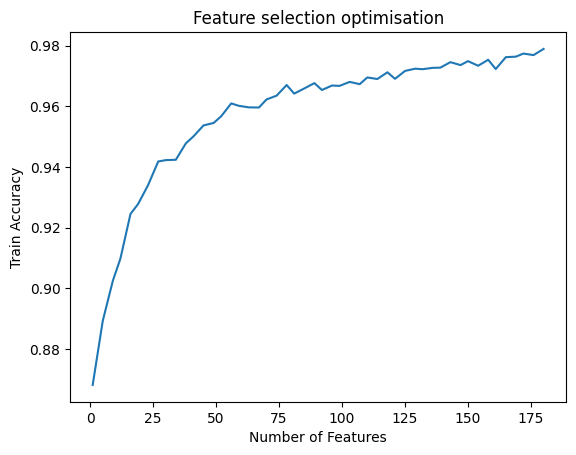

In [57]:
plt.plot(features,accs)
plt.xlabel('Number of Features')
plt.ylabel('Train Accuracy')
plt.title('Feature selection optimisation')


### Training feature-optimised model 

After revising the results of the selectkbest optimisation, we have decided to keep 20 variables (11% of features) to train and optimise the model. Using 20 feaures still gives a good baseline accuracy of roughly 93% while also mantaining the usability of the model. Considering that for the deployment the team would like to have an interactive survey, having 20 is more manageable to construct the survey as opposed to having 50 features:

In [58]:
# Load the pre-trained feature selection model
selection_model =load(open("../models/selectkbest/selection_model0.11.pk", "rb"))
ix = selection_model.get_support()

# Transform the training and training set to include only selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Initialize a decision tree classifier and fit it
model = XGBClassifier(random_state=42)
model.fit(X_train_sel, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Storing dataset:

In [59]:
X_train_sel.to_csv('../data/processed/X_train_sel.csv', index=False)
X_test_sel.to_csv('../data/processed/X_test_sel.csv', index=False)

Baseline model performance after seleckbest optimisation:

In [60]:
# Make predictions on the training set and calculate the accuracy
y_pred = model.predict(X_train_sel)
train_score = accuracy_score(y_train, y_pred)
print(f'The accuracy score for Train is {train_score}.')

# Make predictions on the testing set and calculate the accuracy
y_pred = model.predict(X_test_sel)
test_score = accuracy_score(y_test, y_pred)
print(f'The accuracy score for Test is {test_score}.')

# Calculate and print the difference in accuracy between the training and testing sets
difference = train_score - test_score
print(f'The accuracy difference between the models is {difference}.')

The accuracy score for Train is 0.9277906779181061.
The accuracy score for Test is 0.8844847112117781.
The accuracy difference between the models is 0.043305966706328025.


Selected optimal features:

In [61]:
import json

def cambiar_nombres_desde_json(dataframe, ruta_json):
    # Compruebo que puedo cargar el JSON
    with open(ruta_json, 'r') as file:
        nombres_nuevos = json.load(file)

    df_con_nombres = dataframe.copy()  # Crear una copia del DataFrame para evitar modificar el original
    
    for columna in dataframe.columns:
        nuevo_nombre = nombres_nuevos.get(columna, {}).get('Descripción', columna)
        df_con_nombres.rename(columns={columna:f'{columna};{nuevo_nombre}' }, inplace=True)

    return df_con_nombres

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns

Index(['G21;Estado de salud percibido en los últimos 12 meses',
       'G24a;Estado de salud bucodental',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25a_14;Ha padecido alguna vez: Incontinencia urinaria o problemas de control de la orina',
       'G25a_18;Ha padecido alguna vez: Estreñimiento crónico',
       'G25a_24;Ha padecido alguna vez: Migraña o dolor de cabeza frecuente',
       'G25a_25;Ha padecido alguna vez: Hemorroides',
       'G25a_27;Ha padecido alguna vez: Osteoporosis',
       'K37;Dificultad para caminar 500 metros sin ayuda',
       'K38;Dificultad para subir o bajar 12 escalones',
       'K38a;Dificultad para concentrarse',
       'L45;Grado de dolor padecido durante las últimas 4 semanas',
       'N48;Tiempo desde la

#### Feature importance

The 3 most important variables for the feature-optimised model are L45: degree of pain experienced the last 4 weeks, G24a: oral health status, and G21: perceived health status during the last 12 months

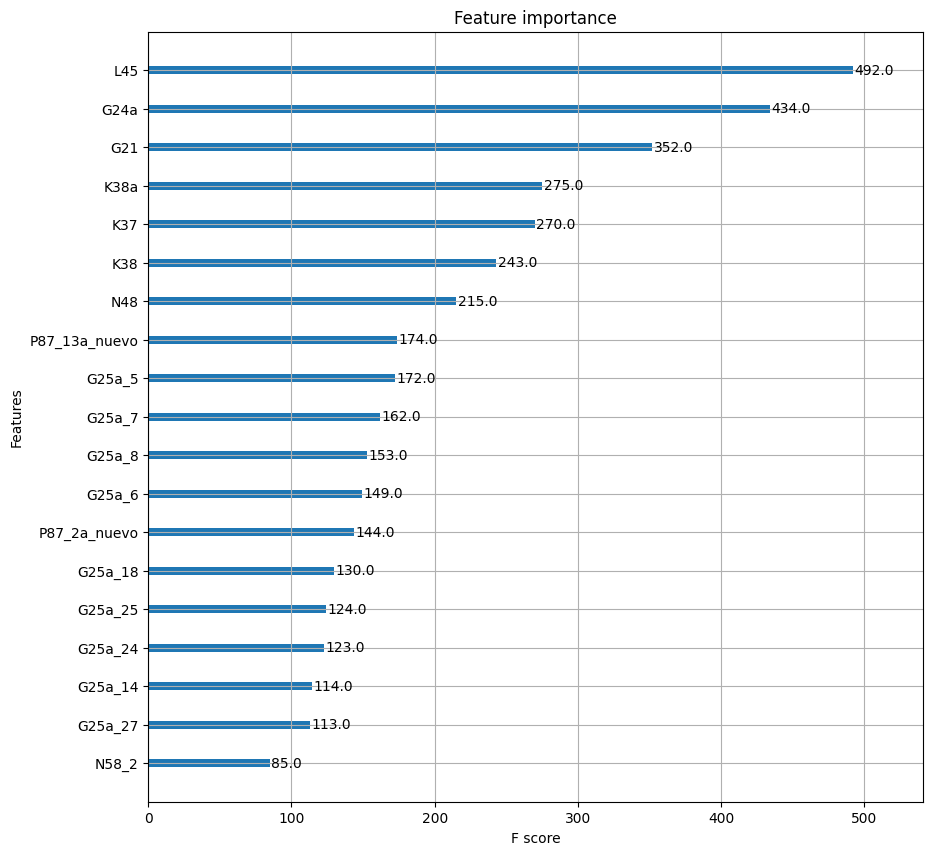

In [62]:
# Visualizar la importancia de las características
# plt.figure(figsize=(80,80))
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)

# plot_importance(model_x, height=10)
plt.show()
# plt.tight_layout()

## Part 2 - XGB classifier optimisation

grid param optimised with chat gpt

In [111]:
from scipy.stats import randint
grid_param = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4]
}

In [112]:
rand_search=RandomizedSearchCV(model, grid_param, scoring='accuracy', refit=True,n_iter = 100, cv = 5, random_state = 42, verbose=2)

In [113]:
rand_search.fit(X_train_sel,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=124, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=124, subsample=1.0; total tim

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f57c5c990>,
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f57415f90>,
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [114]:
best_params=rand_search.best_params_
print(best_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 66, 'subsample': 0.8}


**Training optimised boosting model:**

In [115]:
model_opt=XGBClassifier(**best_params, random_state=42)

In [119]:
model_opt.fit(X_train_sel, y_train)

#pickle
dump(model_opt, open(f'../models/boost{best_params}.pk', 'wb'))

In [120]:
y_pred_train=model_opt.predict(X_train_sel)
y_pred=model_opt.predict(X_test_sel)
boost_acc_opt= accuracy_score(y_pred,y_test)
print('Accuracy train: ', accuracy_score(y_pred_train,y_train))
print('Accuracy test: ', boost_acc_opt)



Accuracy train:  0.892110777595288
Accuracy test:  0.891506228765572
